# Libraries

In [1]:
!pip install requests
!pip install textblob
!pip install wordcloud
!pip install imageio


# Libraries and Download Data

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import requests
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio
import numpy as np


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Fetch Hamlet

In [3]:
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text


# Generate Word Frequencies

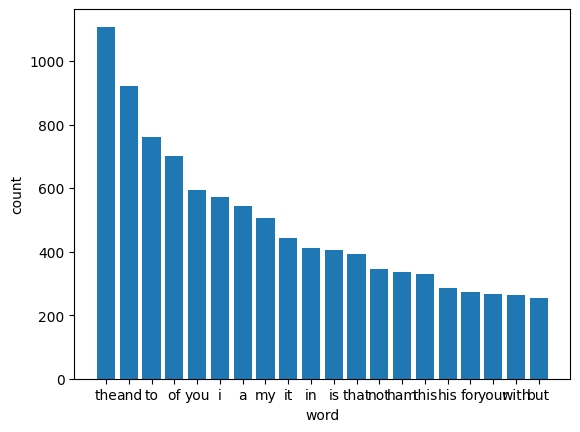

In [4]:
blob = TextBlob(data)
words = [word.lower() for word in blob.words if word.isalpha()]
word_freq = nltk.FreqDist(words)

# Visualize top 20 words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xlabel('word')
plt.ylabel('count')
plt.show()


# Generate Word Cloud with Mask

<ipython-input-8-5c7584109fc9>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


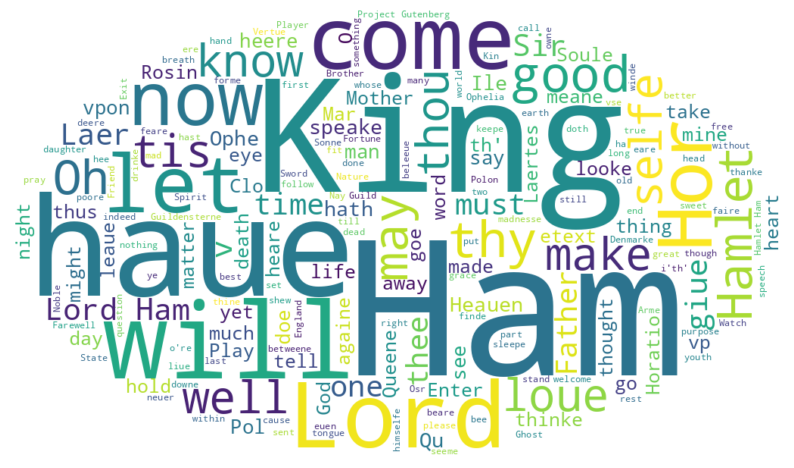

In [8]:
import imageio
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)
wordcloud = WordCloud(mask=mask_image, background_color="white").generate(data)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the Word Cloud

In [6]:
wordcloud.to_file("Hamlet.png")
